<a href="https://colab.research.google.com/github/nanindyapramesthi-bit/DataAnalyticsTasks/blob/main/Project_Analisis_Regresi_Dataset_Customer_dan_Laptop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengimpor library yang diperlukan
from pprint import pprint
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sa
import statsmodels.formula.api as sm
%matplotlib inline

Load and Explore data

In [ ]:
# Upload dataset dari lokal ke Google Colab
from google.colab import files
uploaded = files.upload()

Saving customer_data.csv to customer_data.csv
Saving laptop_data.csv to laptop_data.csv


In [ ]:
# Membaca dataset dari file Excel
start = time()
data_customer = pd.read_csv('customer_data.csv')
data_laptop = pd.read_csv('laptop_data.csv')
end = time()
print("Done loading all datasets in {:.3f}s".format(end-start))

Done loading all datasets in 0.018s


In [ ]:
with pd.option_context("display.max_columns", None):
    display(data_customer.head())

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,58138.0,9/4/2012,58,8,4,7
1,2174,1954,Graduation,46344.0,3/8/2014,38,1,2,5
2,4141,1965,Graduation,71613.0,8/21/2013,26,8,10,4
3,6182,1984,Graduation,26646.0,2/10/2014,26,2,4,6
4,5324,1981,PhD,58293.0,1/19/2014,94,5,6,5


In [ ]:
with pd.option_context("display.max_columns", None):
    display(data_laptop.head())

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
print("num of customer:", data_customer.shape[0])
print("num of laptop:", data_laptop.shape[0])

num of customer: 2240
num of laptop: 1273


In [ ]:
##memperlihatkan info data untuk tiap field yang ada
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Dt_Customer        2240 non-null   object 
 5   Recency            2240 non-null   int64  
 6   NumWebPurchases    2240 non-null   int64  
 7   NumStorePurchases  2240 non-null   int64  
 8   NumWebVisitsMonth  2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


In [ ]:
data_customer.describe()

,ID,Year_Birth,Income,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,49.109375,4.084821,5.790179,5.316518
std,3246.662198,11.984069,25173.076661,28.962453,2.778714,3.250958,2.426645
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,24.000000,2.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51381.500000,49.000000,4.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68522.000000,74.000000,6.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,99.000000,27.000000,13.000000,20.000000


In [ ]:
data_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [ ]:
data_laptop.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


Exploratory Data Analysis

In [ ]:
# Mengecek jumlah data duplikat pada data customer
jumlah_duplikat = data_customer.duplicated().sum()
# Menampilkan jumlah data duplikat
print("Jumlah data duplikat:", jumlah_duplikat)

Jumlah data duplikat: 0


In [ ]:
# Ubah kolom Dt_Customer menjadi Years_Since_Registration
data_customer['Dt_Customer'] = pd.to_datetime(data_customer['Dt_Customer'])
current_year = datetime.now().year
data_customer['Dt_Customer'] = current_year - data_customer['Dt_Customer'].dt.year
data_customer.rename(columns={'Dt_Customer': 'Years_Since_Registration'}, inplace=True)
# Ubah kolom Year_Birth menjadi Age
data_customer['Year_Birth'] = current_year - data_customer['Year_Birth']
data_customer.rename(columns={'Year_Birth': 'Age'}, inplace=True)

In [ ]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2240 non-null   int64  
 1   Age                       2240 non-null   int64  
 2   Education                 2240 non-null   object 
 3   Income                    2216 non-null   float64
 4   Years_Since_Registration  2240 non-null   int32  
 5   Recency                   2240 non-null   int64  
 6   NumWebPurchases           2240 non-null   int64  
 7   NumStorePurchases         2240 non-null   int64  
 8   NumWebVisitsMonth         2240 non-null   int64  
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 148.9+ KB


In [ ]:
data_customer.head()

,ID,Age,Education,Income,Years_Since_Registration,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,67,Graduation,58138.0,12,58,8,4,7
1,2174,70,Graduation,46344.0,10,38,1,2,5
2,4141,59,Graduation,71613.0,11,26,8,10,4
3,6182,40,Graduation,26646.0,10,26,2,4,6
4,5324,43,PhD,58293.0,10,94,5,6,5


In [ ]:
# Mengecek jumlah data duplikat pada data laptop
jumlah_duplikat = data_laptop.duplicated().sum()
# Menampilkan jumlah data duplikat
print("Jumlah data duplikat:", jumlah_duplikat)

Jumlah data duplikat: 1


In [ ]:
## Handling Duplicates
# menghapus baris yang merupakan duplikat pada data laptop
data_laptop.drop_duplicates(inplace=True)

In [ ]:
# Mengecek jumlah data duplikat pada data laptop
jumlah_duplikat = data_laptop.duplicated().sum()
# Menampilkan jumlah data duplikat
print("Jumlah data duplikat:", jumlah_duplikat)

Jumlah data duplikat: 0


In [ ]:
#Handling Typo pada kolom Education
#Disini saya menganggap Basic pada education itu sama dengan Graduation, dan untuk 2n Cycle sama dengan Master
data_customer['Education'] = data_customer['Education'].replace({
    'Basic': 'Graduation',
    '2n Cycle': 'Master'
})

In [ ]:
# Cek jumlah missing value pada data customer
data_customer.isnull().sum()

ID                           0
Age                          0
Education                    0
Income                      24
Years_Since_Registration     0
Recency                      0
NumWebPurchases              0
NumStorePurchases            0
NumWebVisitsMonth            0
dtype: int64

In [ ]:
##Handling Missing Value pada data customer kolom income
#Membuat dictionary yang berisi median income untuk setiap kategori pendidikan (karena terdapat outlier pada kolom income)
median_income_by_education = data_customer.groupby('Education')['Income'].median().to_dict()

# Mengisi missing value dengan median income berdasarkan education
data_customer['Income'] = data_customer.apply(lambda row: median_income_by_education[row['Education']] if pd.isna(row['Income']) else row['Income'], axis=1)


In [ ]:
# Cek jumlah missing value
data_customer.isnull().sum()

ID                          0
Age                         0
Education                   0
Income                      0
Years_Since_Registration    0
Recency                     0
NumWebPurchases             0
NumStorePurchases           0
NumWebVisitsMonth           0
dtype: int64

In [ ]:
# Cek jumlah missing value pada data laptop
data_laptop.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

Mengecek Outliers pada Data Customer

Jumlah nilai Income outlier: 8


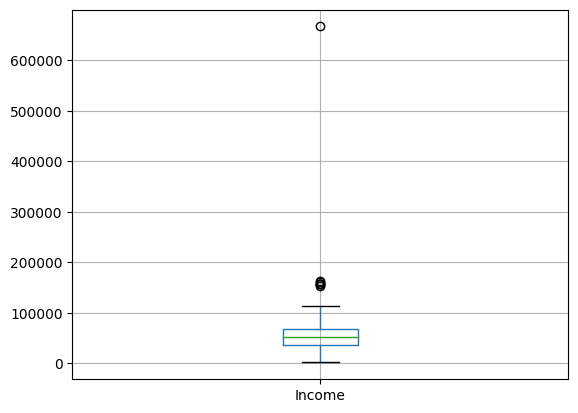

In [ ]:
# Identifikasi outlier dengan boxplot atau metode lainnya
# untuk Income:
data_customer.boxplot(column=['Income'])
Q1 = data_customer['Income'].quantile(0.25)
Q3 = data_customer['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers
outliers_count = data_customer[(data_customer['Income'] < lower_bound) | (data_customer['Income'] > upper_bound)].shape[0]
print("Jumlah nilai Income outlier:", outliers_count)

Jumlah nilai Recency outlier: 0


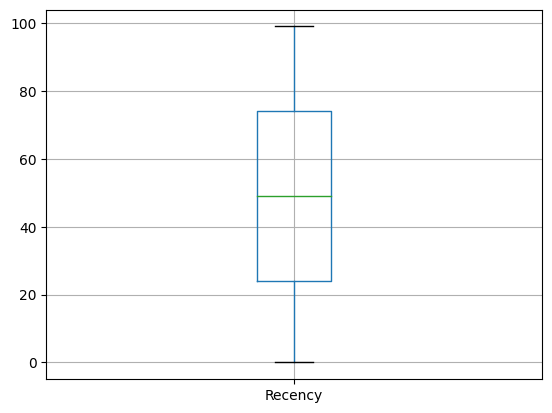

In [ ]:
data_customer.boxplot(column=['Recency'])
Q1 = data_customer['Recency'].quantile(0.25)
Q3 = data_customer['Recency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers
outliers_count = data_customer[(data_customer['Recency'] < lower_bound) | (data_customer['Recency'] > upper_bound)].shape[0]
print("Jumlah nilai Recency outlier:", outliers_count)

Jumlah nilai NumWebPurchases outlier: 4


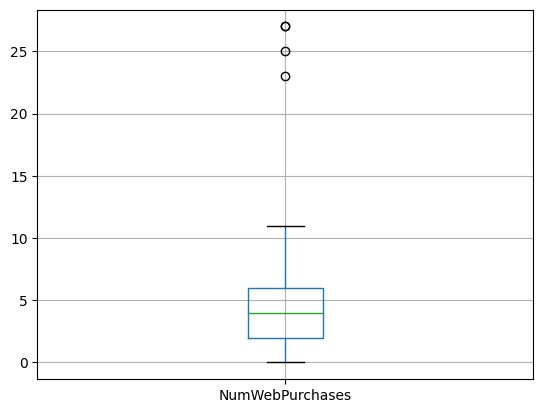

In [ ]:
data_customer.boxplot(column=['NumWebPurchases'])
Q1 = data_customer['NumWebPurchases'].quantile(0.25)
Q3 = data_customer['NumWebPurchases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers
outliers_count = data_customer[(data_customer['NumWebPurchases'] < lower_bound) | (data_customer['NumWebPurchases'] > upper_bound)].shape[0]
print("Jumlah nilai NumWebPurchases outlier:", outliers_count)

Jumlah nilai Age outlier: 3


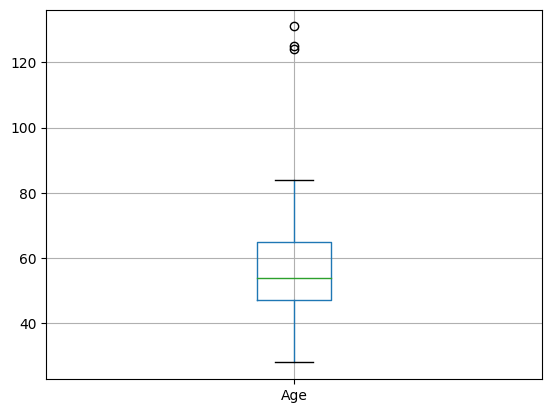

In [ ]:
data_customer.boxplot(column=['Age'])
Q1 = data_customer['Age'].quantile(0.25)
Q3 = data_customer['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers
outliers_count = data_customer[(data_customer['Age'] < lower_bound) | (data_customer['Age'] > upper_bound)].shape[0]
print("Jumlah nilai Age outlier:", outliers_count)

Jumlah nilai NumStorePurchases outlier: 0


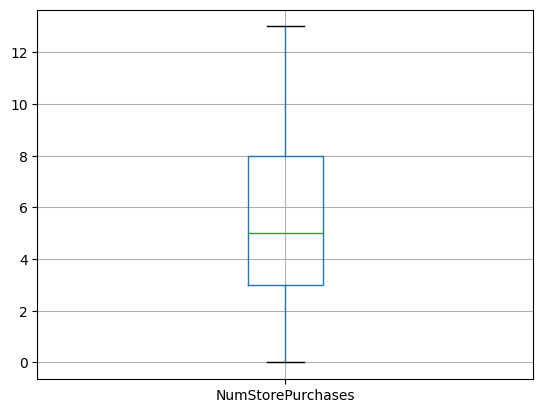

In [ ]:
data_customer.boxplot(column=['NumStorePurchases'])
Q1 = data_customer['NumStorePurchases'].quantile(0.25)
Q3 = data_customer['NumStorePurchases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers
outliers_count = data_customer[(data_customer['NumStorePurchases'] < lower_bound) | (data_customer['NumStorePurchases'] > upper_bound)].shape[0]
print("Jumlah nilai NumStorePurchases outlier:", outliers_count)

Jumlah nilai NumWebVisitsMonth outlier: 8


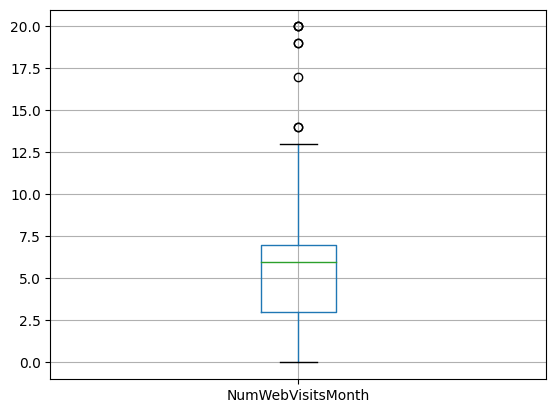

In [ ]:
data_customer.boxplot(column=['NumWebVisitsMonth'])
Q1 = data_customer['NumWebVisitsMonth'].quantile(0.25)
Q3 = data_customer['NumWebVisitsMonth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers
outliers_count = data_customer[(data_customer['NumWebVisitsMonth'] < lower_bound) | (data_customer['NumWebVisitsMonth'] > upper_bound)].shape[0]
print("Jumlah nilai NumWebVisitsMonth outlier:", outliers_count)

Mengecek Outlier pada Data Laptop

Jumlah nilai Price outlier: 1


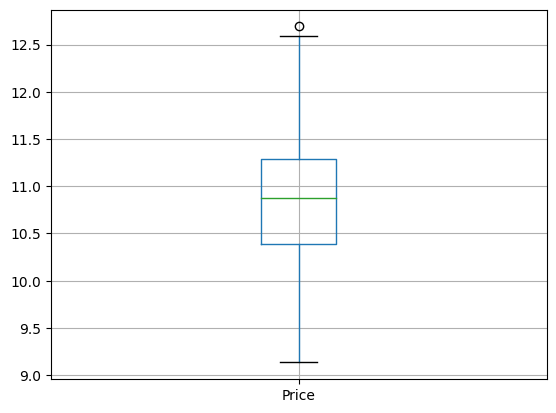

In [ ]:
# Identifikasi outlier dengan boxplot atau metode lainnya
# untuk Price:
data_laptop.boxplot(column=['Price'])
Q1 = data_laptop['Price'].quantile(0.25)
Q3 = data_laptop['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers
outliers_count = data_laptop[(data_laptop['Price'] < lower_bound) | (data_laptop['Price'] > upper_bound)].shape[0]
print("Jumlah nilai Price outlier:", outliers_count)


In [ ]:
##Handling Outlier pada Data Laptop kolom Price
#Karena jumlah outlier hanya satu sehingga saya memutuskan untuk drop baris outlier tersebut karena tidak terlalu berpengaruh pada data
data_laptop = data_laptop[(data_laptop['Price'] >= lower_bound) & (data_laptop['Price'] <= upper_bound)]

Jumlah nilai Price outlier: 0


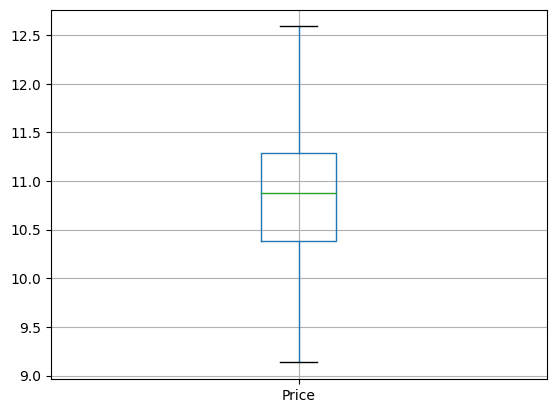

In [ ]:
#cek Outlier setelah handling
# untuk Price:
data_laptop.boxplot(column=['Price'])
Q1 = data_laptop['Price'].quantile(0.25)
Q3 = data_laptop['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers
outliers_count = data_laptop[(data_laptop['Price'] < lower_bound) | (data_laptop['Price'] > upper_bound)].shape[0]
print("Jumlah nilai Price outlier:", outliers_count)

In [ ]:
data_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1271 non-null   object 
 1   TypeName     1271 non-null   object 
 2   Ram          1271 non-null   int64  
 3   Weight       1271 non-null   float64
 4   Price        1271 non-null   float64
 5   TouchScreen  1271 non-null   int64  
 6   Ips          1271 non-null   int64  
 7   Ppi          1271 non-null   float64
 8   Cpu_brand    1271 non-null   object 
 9   HDD          1271 non-null   int64  
 10  SSD          1271 non-null   int64  
 11  Gpu_brand    1271 non-null   object 
 12  Os           1271 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 139.0+ KB


In [ ]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2240 non-null   int64  
 1   Age                       2240 non-null   int64  
 2   Education                 2240 non-null   object 
 3   Income                    2240 non-null   float64
 4   Years_Since_Registration  2240 non-null   int32  
 5   Recency                   2240 non-null   int64  
 6   NumWebPurchases           2240 non-null   int64  
 7   NumStorePurchases         2240 non-null   int64  
 8   NumWebVisitsMonth         2240 non-null   int64  
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 148.9+ KB


No. 1

Clustering Data

In [ ]:
# Memilih fitur untuk clustering
features = ['Age', 'Education', 'Income', 'Years_Since_Registration', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
X = data_customer[features]


In [ ]:
#Preparation
#mengubah fitur kategorik (Education) menjadi matriks one-hot
encoder = OneHotEncoder()
encoder.fit(X.select_dtypes(include="object"))
X_onehot = pd.DataFrame(encoder.transform(X.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

X_preprocessed = pd.concat([X.select_dtypes(exclude="object"), X_onehot],axis=1)

# Standarisasi fitur
scaler = StandardScaler()
scaler.fit(X_preprocessed)
X_scaled = pd.DataFrame(scaler.transform(X_preprocessed),columns=X_preprocessed.columns)

X_scaled.head()

,Age,Income,Years_Since_Registration,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Education_Graduation,Education_Master,Education_PhD
0,0.985345,0.235822,1.502225,0.307039,1.409304,-0.550785,0.693904,0.946941,-0.586286,-0.526385
1,1.235733,-0.235307,-1.420036,-0.383664,-1.110409,-1.166125,-0.130463,0.946941,-0.586286,-0.526385
2,0.317643,0.774101,0.041094,-0.798086,1.409304,1.295237,-0.542647,0.946941,-0.586286,-0.526385
3,-1.268149,-1.022173,-1.420036,-0.798086,-0.750450,-0.550785,0.281720,0.946941,-0.586286,-0.526385
4,-1.017761,0.242014,-1.420036,1.550305,0.329427,0.064556,-0.130463,-1.056032,-0.586286,1.899751


In [ ]:
##Metode Elbow untuk menentukan jumlah cluster optimal
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 20):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.591s
Clustering with n_clusters=2
Done clustering in 0.161s
Clustering with n_clusters=3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.542s
Clustering with n_clusters=4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.396s
Clustering with n_clusters=5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.393s
Clustering with n_clusters=6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.613s
Clustering with n_clusters=7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.537s
Clustering with n_clusters=8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 1.078s
Clustering with n_clusters=9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 1.844s
Clustering with n_clusters=10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.429s
Clustering with n_clusters=11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.637s
Clustering with n_clusters=12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.557s
Clustering with n_clusters=13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.633s
Clustering with n_clusters=14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.828s
Clustering with n_clusters=15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.883s
Clustering with n_clusters=16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.540s
Clustering with n_clusters=17


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.840s
Clustering with n_clusters=18


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 1.153s
Clustering with n_clusters=19


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done clustering in 0.595s


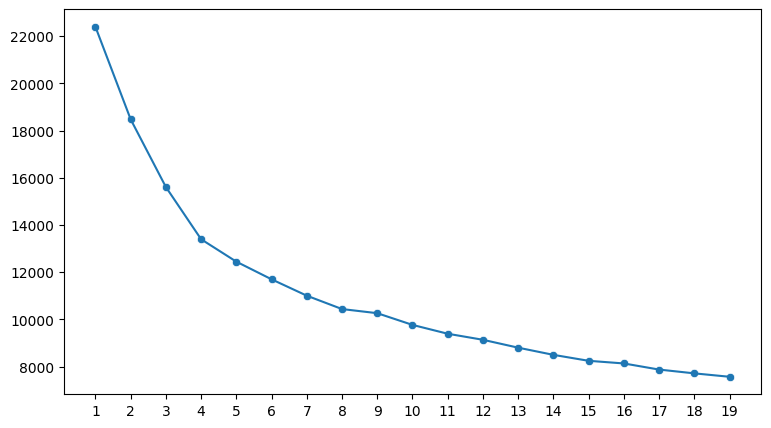

In [ ]:
plt.figure(figsize=(9, 5))
sns.lineplot(x=range(1, 20), y=ssd)
sns.scatterplot(x=range(1, 20), y=ssd)
plt.xticks(range(1, 20))
plt.show()

In [ ]:
# Menentukan jumlah cluster berdasarkan hasil metode elbow dapat dilihat membentuk siku pada cluster ke-4
k = 4

In [ ]:
# Membuat model KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

start = time()
kmeans.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done fitting kMeans in 0.645s


In [ ]:
#membuat kolom baru pada data X yang merepresentasikan cluster dari model
X = X.assign(
    clusters_of_4=kmeans.predict(X_scaled),
)
with pd.option_context("display.max_columns", None):
    display(X.head())

,Age,Education,Income,Years_Since_Registration,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,clusters_of_4
0,67,Graduation,58138.0,12,58,8,4,7,2
1,70,Graduation,46344.0,10,38,1,2,5,0
2,59,Graduation,71613.0,11,26,8,10,4,2
3,40,Graduation,26646.0,10,26,2,4,6,0
4,43,PhD,58293.0,10,94,5,6,5,1


<ipython-input-273-b1fe7f0bc0ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='clusters_of_4', data=X, palette="Paired")


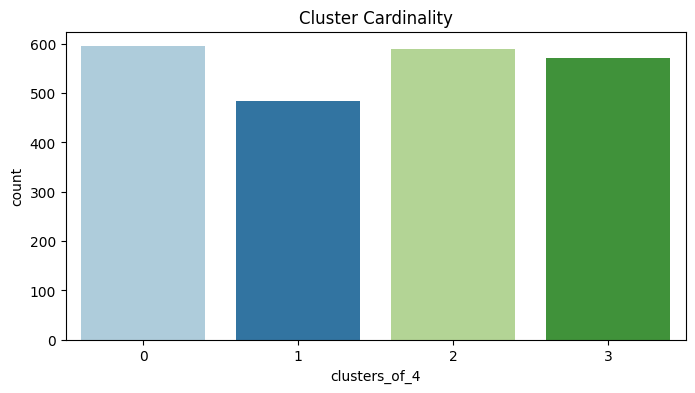

In [ ]:
# Plot distribusi jumlah data di setiap cluster
plt.figure(figsize=(8, 4))
sns.countplot(x='clusters_of_4', data=X, palette="Paired")
plt.title("Cluster Cardinality")
plt.show()

In [ ]:
# Melakukan clustering
data_customer['Cluster'] = kmeans.fit_predict(X_scaled)

# Menampilkan hasil clustering
print(data_customer[['ID', 'Cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         ID  Cluster
0      5524        2
1      2174        0
2      4141        2
3      6182        0
4      5324        1
...     ...      ...
2235  10870        2
2236   4001        1
2237   7270        2
2238   8235        3
2239   9405        1

[2240 rows x 2 columns]


In [ ]:
# Menghitung jumlah entri di setiap klaster
cluster_counts = data_customer['Cluster'].value_counts()
cluster_counts

Cluster
0    595
2    590
3    572
1    483
Name: count, dtype: int64

In [ ]:
# Misalnya, untuk fitur 'Education', hitung jumlah masing-masing nilai dalam setiap cluster
education_counts = data_customer.groupby(['Cluster', 'Education']).size().unstack(fill_value=0)

# Tampilkan deskripsi statistik untuk fitur 'Education' dalam setiap cluster
print(education_counts)


Education  Graduation  Master  PhD
Cluster                           
0                 591       1    3
1                   0       0  483
2                 590       0    0
3                   0     572    0


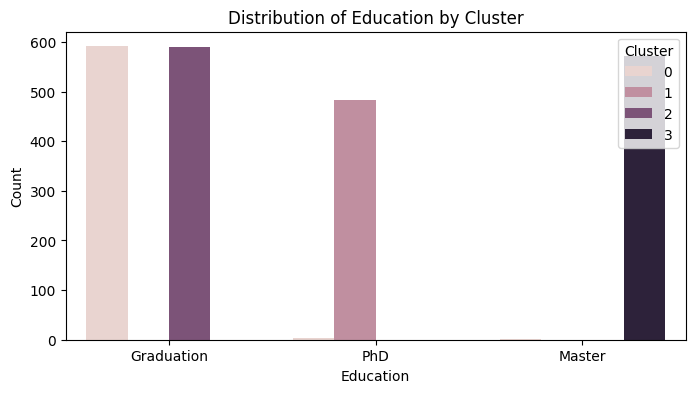

In [ ]:
# Buat bar plot untuk fitur 'Education' dalam setiap cluster
plt.figure(figsize=(8, 4))
sns.countplot(x='Education', hue='Cluster', data=data_customer)
plt.title('Distribution of Education by Cluster')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [ ]:
segmentation_table = data_customer.groupby('Cluster').agg({'Age': ['mean', 'count'],
                                                          'Income': ['mean', 'count'],
                                                          'Years_Since_Registration': ['mean', 'count'],
                                                          'Recency': ['mean', 'count'],
                                                          'NumWebPurchases': ['mean', 'count'],
                                                          'NumStorePurchases': ['mean', 'count'],
                                                          'NumWebVisitsMonth': ['mean', 'count']})
# Menampilkan tabel segmentasi pelanggan
segmentation_table

Age              Income       Years_Since_Registration        \
              mean count          mean count                     mean count   
Cluster                                                                       
0        51.421849   595  32716.526050   595                10.996639   595   
1        57.898551   483  56450.207039   483                10.942029   483   
2        56.661017   590  69562.379661   590                10.979661   590   
3        55.321678   572  51104.576923   572                10.963287   572   

           Recency       NumWebPurchases       NumStorePurchases        \
              mean count            mean count              mean count   
Cluster                                                                  
0        50.258824   595        2.342857   595          3.201681   595   
1        48.426501   483        4.449275   483          6.097308   483   
2        49.622034   590        5.693220   590          8.171186   590   
3        47.961538   572        3.930070   572          5.767483   572   

        NumWebVisitsMonth        
                     mean count  
Cluster                          
0                6.852101   595  
1                5.169772   483  
2                3.947458   590  
3                5.255245   572

In [ ]:
# Menyimpan tabel segmentasi ke dalam file CSV
segmentation_table.to_csv('segmentation_table.csv')

No. 2

In [ ]:
data_laptop.Company.value_counts().to_frame()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,47
Apple,21
Samsung,8


<Axes: xlabel='TouchScreen', ylabel='Price'>

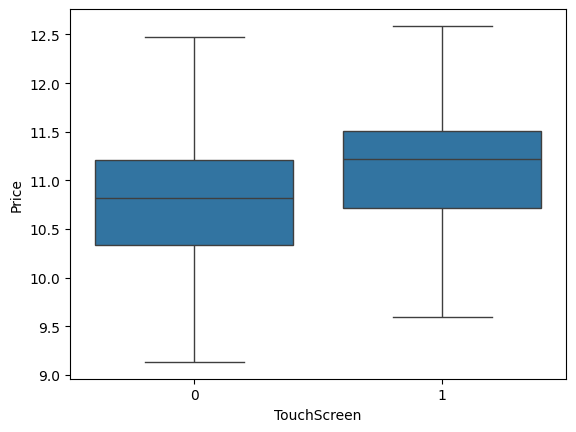

In [ ]:
sns.boxplot(x='TouchScreen',y='Price',data=data_laptop)

(0.0, 16.4874008138427)

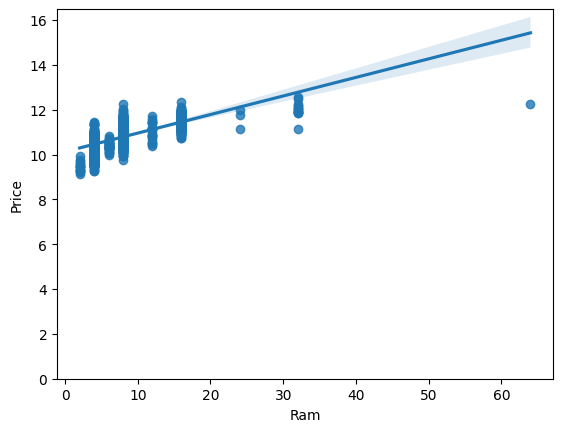

In [ ]:
#fungsi regplot pada seaborn library untuk menentukan apakah fitur-fitur yang ada  berkorelasi negatif atau positif terhadap price
#fitur Ram
sns.regplot(x=data_laptop["Ram"],y=data_laptop["Price"],data=data_laptop)
plt.ylim(0,)

(0.0, 12.760545874604611)

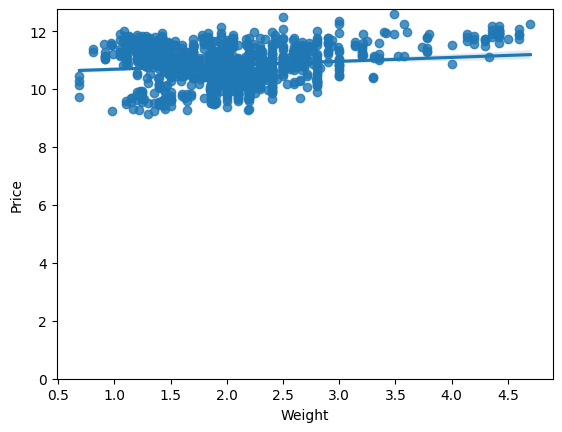

In [ ]:
#fitur Weight
sns.regplot(x=data_laptop["Weight"],y=data_laptop["Price"],data=data_laptop)
plt.ylim(0,)

(0.0, 12.760545874604611)

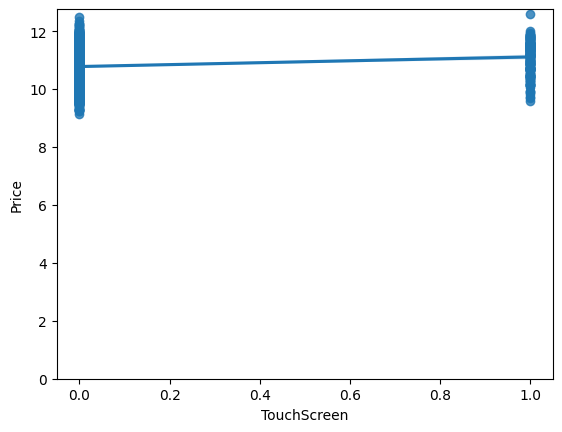

In [ ]:
#fitur TouchScreen
sns.regplot(x=data_laptop["TouchScreen"],y=data_laptop["Price"],data=data_laptop)
plt.ylim(0,)

(0.0, 12.760545874604611)

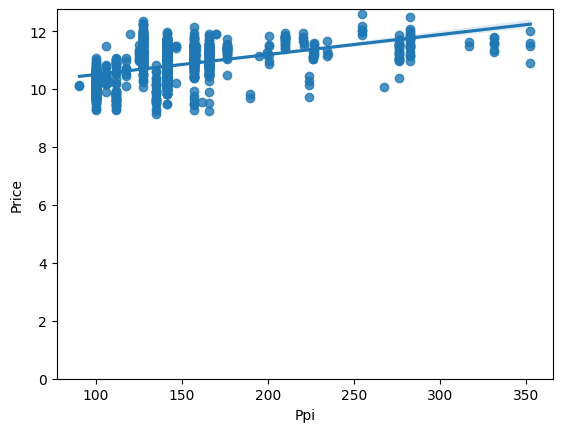

In [ ]:
#fitur Ppi
sns.regplot(x=data_laptop["Ppi"],y=data_laptop["Price"],data=data_laptop)
plt.ylim(0,)

(0.0, 12.760545874604611)

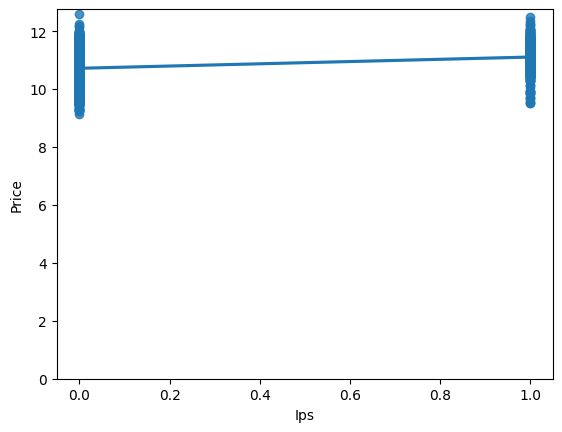

In [ ]:
#fitur Ips
sns.regplot(x=data_laptop["Ips"],y=data_laptop["Price"],data=data_laptop)
plt.ylim(0,)

(0.0, 12.760545874604611)

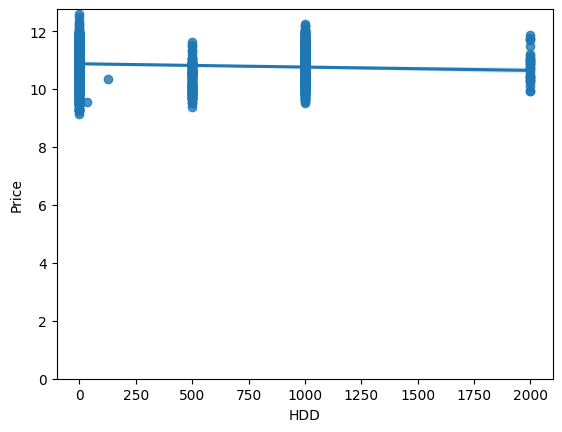

In [ ]:
#fitur HDD
sns.regplot(x=data_laptop["HDD"],y=data_laptop["Price"],data=data_laptop)
plt.ylim(0,)

(0.0, 12.994419800994551)

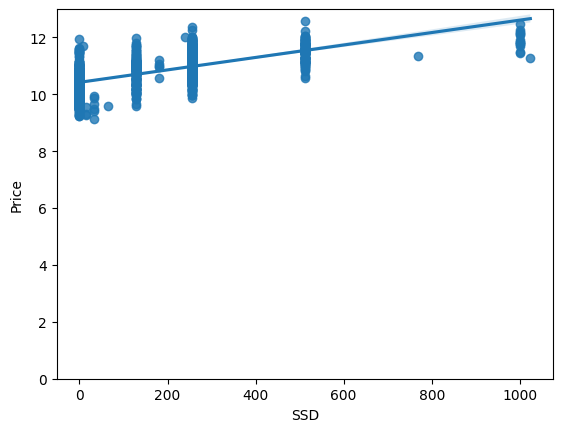

In [ ]:
#fitur SSD
sns.regplot(x=data_laptop["SSD"],y=data_laptop["Price"],data=data_laptop)
plt.ylim(0,)

In [ ]:
encoder = LabelEncoder()
data_laptop['Company']=encoder.fit_transform(data_laptop['Company'])
data_laptop['TypeName']=encoder.fit_transform(data_laptop['TypeName'])
data_laptop['Cpu_brand']=encoder.fit_transform(data_laptop['Cpu_brand'])
data_laptop['Gpu_brand']=encoder.fit_transform(data_laptop['Gpu_brand'])
data_laptop['Os']=encoder.fit_transform(data_laptop['Os'])

In [ ]:
print(data_laptop.head(15))

    Company  TypeName  Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0         1         4    8    1.37  11.175755            0    1  226.983005   
1         1         4    8    1.34  10.776777            0    0  127.677940   
2         7         3    8    1.86  10.329931            0    0  141.211998   
3         1         4   16    1.83  11.814476            0    1  220.534624   
4         1         4    8    1.37  11.473101            0    1  226.983005   
5         0         3    4    2.10   9.967026            0    0  100.454670   
6         1         4   16    2.04  11.644108            0    1  220.534624   
7         1         4    8    1.34  11.030615            0    0  127.677940   
8         2         4   16    1.30  11.285443            0    0  157.350512   
9         0         4    8    1.60  10.621952            0    1  157.350512   
10        7         3    4    1.86   9.951658            0    0  100.454670   
11        7         3    4    1.86   9.819076       

In [ ]:
data_laptop.Company.value_counts().to_frame()

,count
Company,
4,291
10,289
7,268
2,151
0,101
11,54
16,47
1,21
15,8


In [ ]:
#menggunakan metode corr() dari Pandas untuk menentukan fitur selain price yang paling berkorelasi dengan price
data_laptop.corr()['Price'].sort_values()

TypeName      -0.122832
HDD           -0.095628
Company        0.134289
Weight         0.147534
TouchScreen    0.189845
Cpu_brand      0.201506
Os             0.221005
Ips            0.282006
Gpu_brand      0.362384
Ppi            0.477564
SSD            0.655888
Ram            0.678202
Price          1.000000
Name: Price, dtype: float64

In [ ]:
model_1 = sm.ols(formula='Price ~ Company + TypeName + Weight + TouchScreen + Ips + Cpu_brand + Gpu_brand + Ppi + SSD + HDD + Ram + Os', data=data_laptop).fit()

In [ ]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 12 May 2024   Prob (F-statistic):          1.12e-267
Time:                        07:16:28   Log-Likelihood:                -544.38
No. Observations:                1271   AIC:                             1115.
Df Residuals:                    1258   BIC:                             1182.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.1005      0.096     94.732      

In [ ]:
model_2 = sm.ols(formula='Price ~ Company + TypeName + Weight + TouchScreen + Ips + Cpu_brand + Gpu_brand + Ppi + SSD + HDD + Ram + Os', data=data_laptop).fit()

In [ ]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 12 May 2024   Prob (F-statistic):          1.12e-267
Time:                        07:16:34   Log-Likelihood:                -544.38
No. Observations:                1271   AIC:                             1115.
Df Residuals:                    1258   BIC:                             1182.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.1005      0.096     94.732      

In [ ]:
model_3 = sm.ols(formula='Price ~ Company + TypeName + Weight + TouchScreen + Ips + Cpu_brand + Gpu_brand + Ppi + SSD + HDD + Ram + Os', data=data_laptop).fit()

In [ ]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 12 May 2024   Prob (F-statistic):          1.12e-267
Time:                        07:16:40   Log-Likelihood:                -544.38
No. Observations:                1271   AIC:                             1115.
Df Residuals:                    1258   BIC:                             1182.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.1005      0.096     94.732      

In [ ]:
features =['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'SSD', 'Company','TypeName', 'HDD', 'Gpu_brand', 'Cpu_brand', 'Os']

In [ ]:
lm = LinearRegression()
x=data_laptop[features]
y=data_laptop.Price
lm.fit(x,y)
lm.score(x,y)

0.6384382416351971

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [ ]:
#membuat pipeline object untuk memprediksi 'price', fit object tsb menggunakan features di dalam list features, dan hitung R^2
x=data_laptop[features]
y=data_laptop.Price
pipe=Pipeline(Input)
pipe.fit(x,y)
pipe.score(x,y)

0.8608062067704267

Model Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [ ]:
x = data_laptop[features]
y = data_laptop['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 191
number of training samples: 1080


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rm=Ridge(alpha=0.1)
rm.fit(x_train,y_train)
rm.score(x_test,y_test)

0.6399838469604546

In [ ]:
pr=PolynomialFeatures(degree=2) #second order polynomial
x_train_pr=pr.fit_transform(x_train) #train data
x_test_pr=pr.fit_transform(x_test) #test data

rr=Ridge(alpha=0.1) #Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.
rr.fit(x_train_pr,y_train)
rr.score(x_test_pr,y_test)

0.7319285000344417